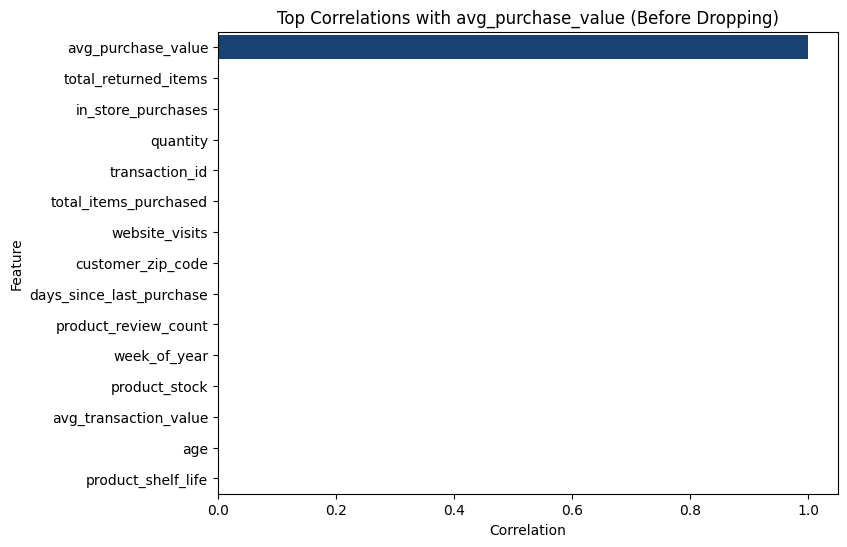

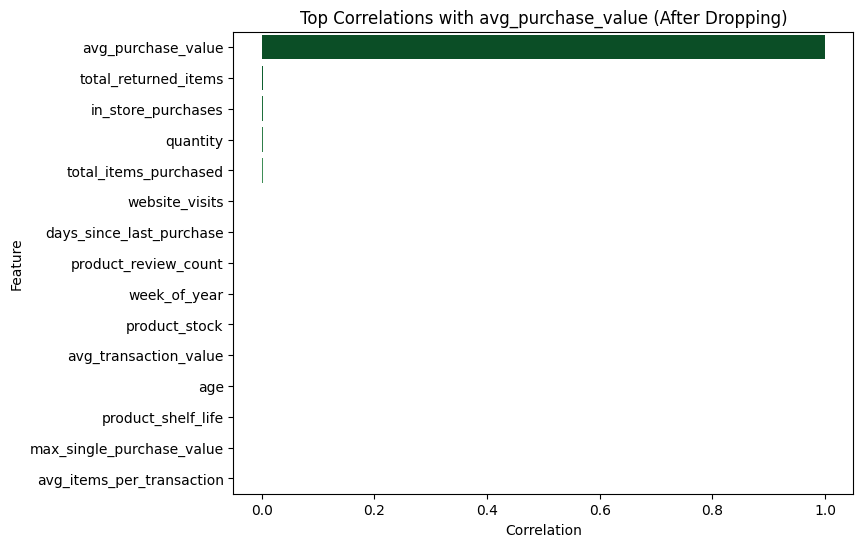

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


file_path = r"C:\Users\DELL\retail_task-1\data\train_data.csv"
df = pd.read_csv(file_path)

y = df["avg_purchase_value"]


drop_cols = [
    "transaction_id", "transaction_date", "product_id", "transaction_hour",
    "day_of_week", "month_of_year", "last_purchase_date", "product_name",
    "product_brand", "product_manufacture_date", "product_expiry_date",
    "promotion_id", "promotion_start_date", "promotion_end_date",
    "customer_zip_code", "store_zip_code"
]


corr_before = df.corr(numeric_only=True)["avg_purchase_value"].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(
    x=corr_before.head(15).values,
    y=corr_before.head(15).index,
    hue=corr_before.head(15).index,
    dodge=False,
    legend=False,
    palette="Blues_r"
)
plt.title("Top Correlations with avg_purchase_value (Before Dropping)")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()

df_dropped = df.drop(columns=drop_cols)
corr_after = df_dropped.corr(numeric_only=True)["avg_purchase_value"].sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(
    x=corr_after.head(15).values,
    y=corr_after.head(15).index,
    hue=corr_after.head(15).index,   # add hue
    dodge=False,
    legend=False,
    palette="Greens_r"
)
plt.title("Top Correlations with avg_purchase_value (After Dropping)")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()


X = df.drop(columns=drop_cols + ["avg_purchase_value"])


categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()


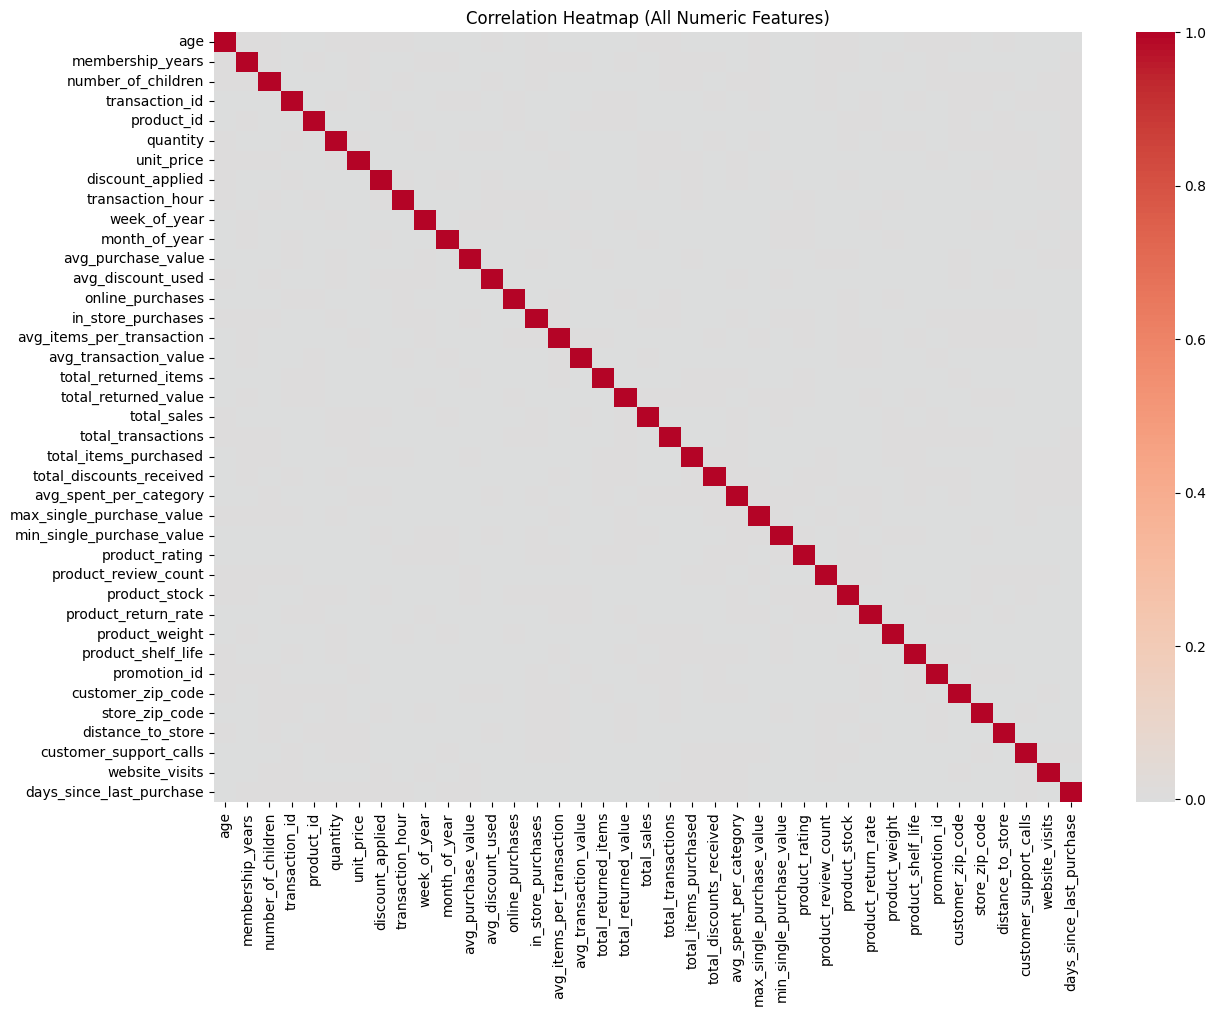

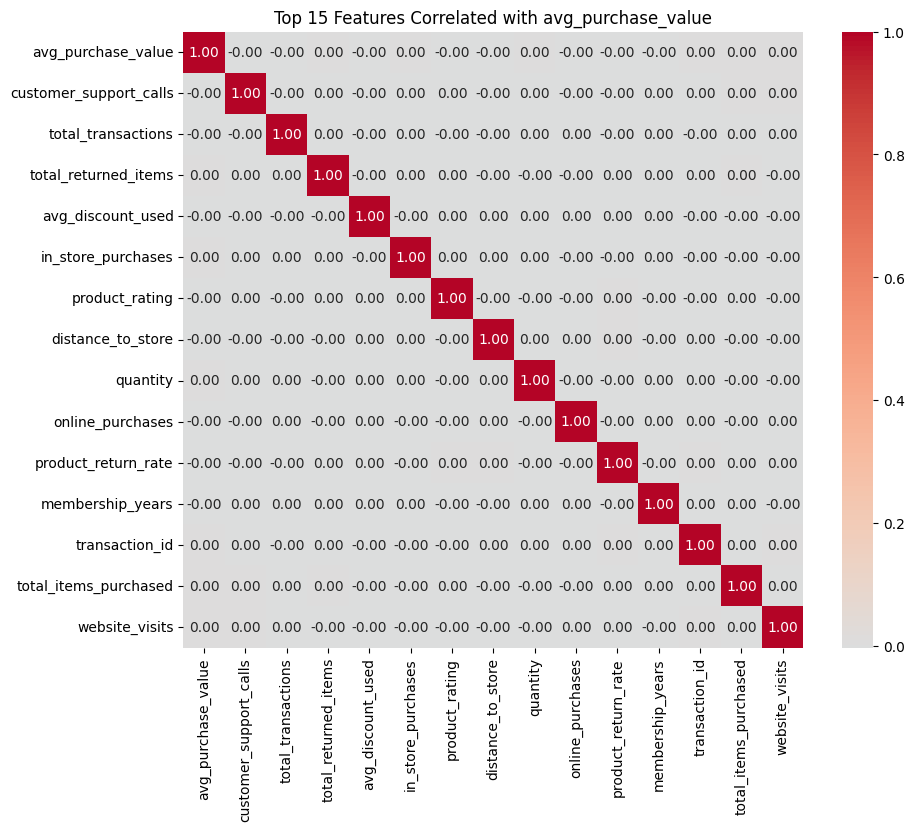

In [ ]:
plt.figure(figsize=(14, 10))
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=False, cbar=True)
plt.title("Correlation Heatmap (All Numeric Features)")
plt.show()

top_features = corr_matrix["avg_purchase_value"].abs().sort_values(ascending=False).head(15).index

plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features].corr(numeric_only=True),
            cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("Top 15 Features Correlated with avg_purchase_value")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


df = pd.read_csv(file_path)

# Target variable
y = df["avg_purchase_value"]

drop_cols = [
    "transaction_id", "transaction_date", "product_id", "transaction_hour",
    "day_of_week", "month_of_year", "last_purchase_date", "product_name",
    "product_brand", "product_manufacture_date", "product_expiry_date",
    "promotion_id", "promotion_start_date", "promotion_end_date",
    "customer_zip_code", "store_zip_code"
]

# Drop irrelevant columns
X = df.drop(columns=drop_cols + ["avg_purchase_value"])

X["age_bucket"] = pd.cut(X["age"], bins=[0, 25, 40, 60, 100], labels=["<25", "25-40", "41-60", ">60"])
X["recency_bucket"] = pd.cut(X["days_since_last_purchase"], bins=[-1, 30, 180, 10000], labels=["recent", "medium", "inactive"])
X["membership_bucket"] = pd.cut(X["membership_years"], bins=[0, 2, 5, 50], labels=["new", "medium", "loyal"])

X["income_loyalty"] = X["income_bracket"].astype(str) + "_" + X["loyalty_program"].astype(str)
X["loyalty_discount"] = X["loyalty_program"].astype(str) + "_" + pd.qcut(X["discount_applied"], 4, labels=False).astype(str)
X["distance_online"] = pd.qcut(X["distance_to_store"], 4, labels=False).astype(str) + "_" + pd.qcut(X["online_purchases"], 4, labels=False).astype(str)

categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# OPTIONAL: sample the dataset for speed (e.g., 50k rows)
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=50000, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

# Fit model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Linear Regression Performance with Buckets + Manual Interaction Terms:")
print("R²:", r2)
print("RMSE:", rmse)
print("MAE:", mae)

Linear Regression Performance with Buckets + Manual Interaction Terms:
R²: -0.003845997668699974
RMSE: 143.477465551427
MAE: 124.42532904028482


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


df = pd.read_csv(file_path)

# Target variable
y = df["avg_purchase_value"]

drop_cols = [
    "transaction_id", "transaction_date", "product_id", "transaction_hour",
    "day_of_week", "month_of_year", "last_purchase_date", "product_name",
    "product_brand", "product_manufacture_date", "product_expiry_date",
    "promotion_id", "promotion_start_date", "promotion_end_date",
    "customer_zip_code", "store_zip_code"
]

# Drop irrelevant columns
X = df.drop(columns=drop_cols + ["avg_purchase_value"])

X["age_bucket"] = pd.cut(X["age"], bins=[0, 25, 40, 60, 100], labels=["<25", "25-40", "41-60", ">60"])
X["recency_bucket"] = pd.cut(X["days_since_last_purchase"], bins=[-1, 30, 180, 10000], labels=["recent", "medium", "inactive"])
X["membership_bucket"] = pd.cut(X["membership_years"], bins=[0, 2, 5, 50], labels=["new", "medium", "loyal"])

X["income_loyalty"] = X["income_bracket"].astype(str) + "_" + X["loyalty_program"].astype(str)
X["loyalty_discount"] = X["loyalty_program"].astype(str) + "_" + pd.qcut(X["discount_applied"], 4, labels=False).astype(str)
X["distance_online"] = pd.qcut(X["distance_to_store"], 4, labels=False).astype(str) + "_" + pd.qcut(X["online_purchases"], 4, labels=False).astype(str)

categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

# Define models
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("rf", RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

gb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("gb", GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42))
])

# OPTIONAL: sample the dataset for speed (e.g., 50k rows)
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=50000, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

# Fit Random Forest
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_mae = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Performance:")
print("R²:", rf_r2)
print("RMSE:", rf_rmse)
print("MAE:", rf_mae)

# Fit Gradient
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

gb_r2 = r2_score(y_test, y_pred_gb)
gb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
gb_mae = mean_absolute_error(y_test, y_pred_gb)

print("\nGradient Boosting Performance:")
print("R²:", gb_r2)
print("RMSE:", gb_rmse)
print("MAE:", gb_mae)

Random Forest Performance:
R²: -0.0115604333068553
RMSE: 144.0277139511879
MAE: 124.67992017

Gradient Boosting Performance:
R²: -0.01310396923954582
RMSE: 144.13755771478628
MAE: 124.84412352209462


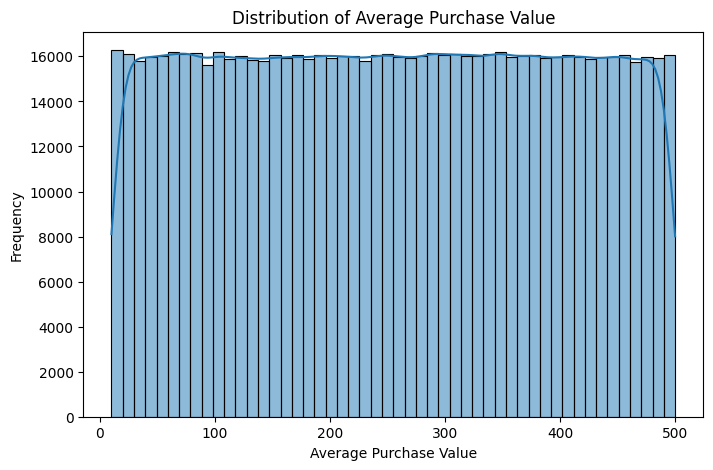

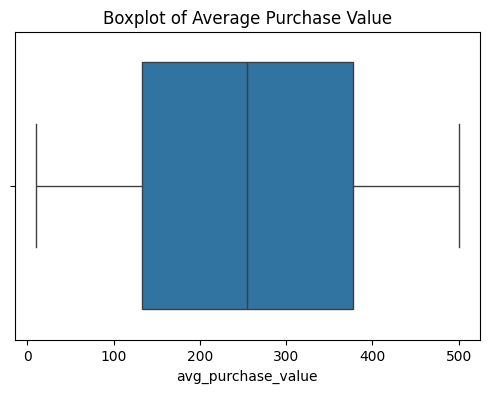

In [ ]:


plt.figure(figsize=(8,5))
sns.histplot(df["avg_purchase_value"], bins=50, kde=True)
plt.title("Distribution of Average Purchase Value")
plt.xlabel("Average Purchase Value")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df["avg_purchase_value"])
plt.title("Boxplot of Average Purchase Value")
plt.show()


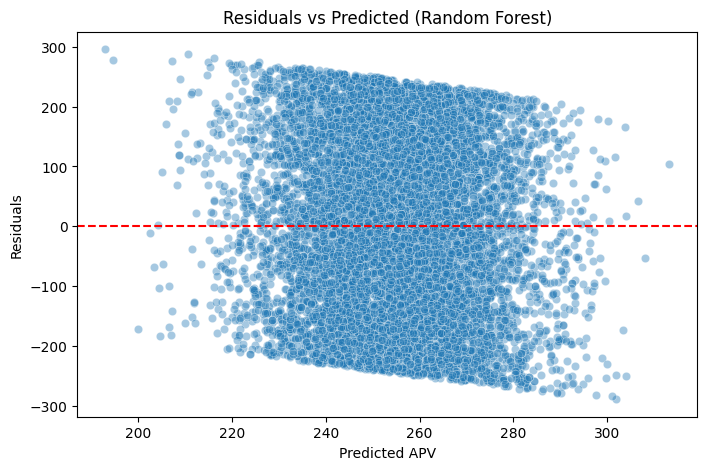

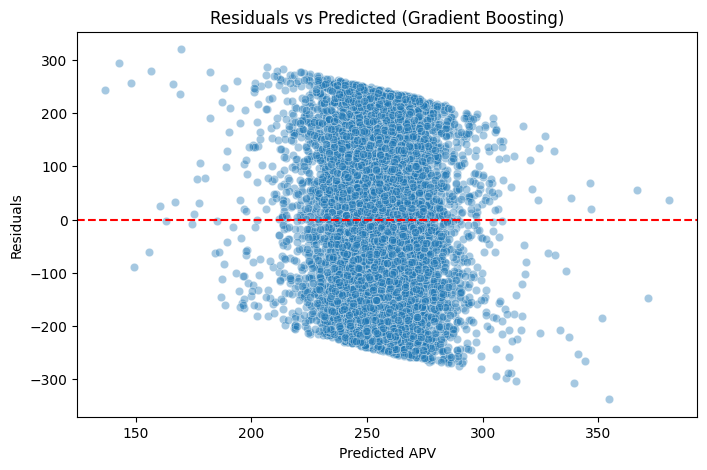

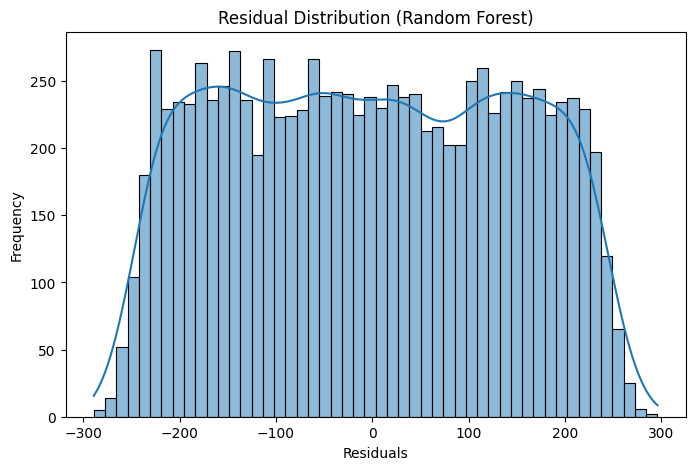

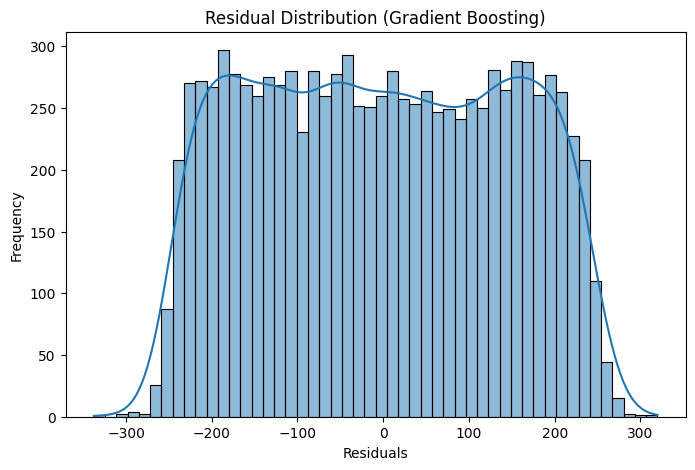

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
residuals_rf = y_test - y_pred_rf
residuals_gb = y_test - y_pred_gb

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_rf, y=residuals_rf, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted (Random Forest)")
plt.xlabel("Predicted APV")
plt.ylabel("Residuals")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_gb, y=residuals_gb, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted (Gradient Boosting)")
plt.xlabel("Predicted APV")
plt.ylabel("Residuals")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(residuals_rf, bins=50, kde=True)
plt.title("Residual Distribution (Random Forest)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(residuals_gb, bins=50, kde=True)
plt.title("Residual Distribution (Gradient Boosting)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


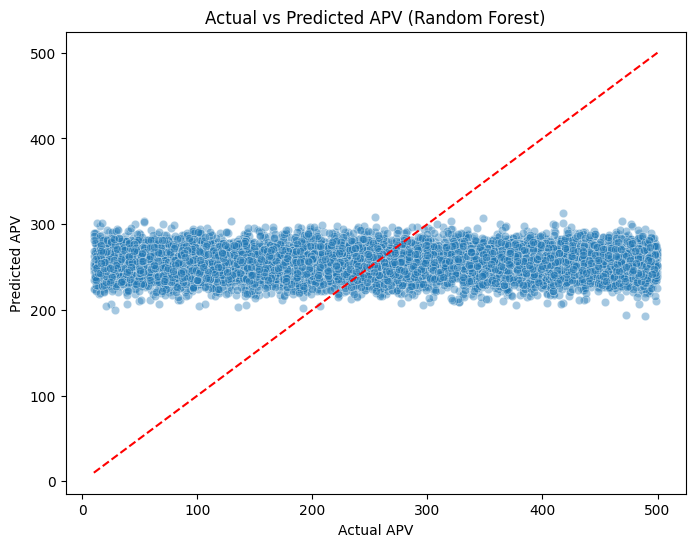

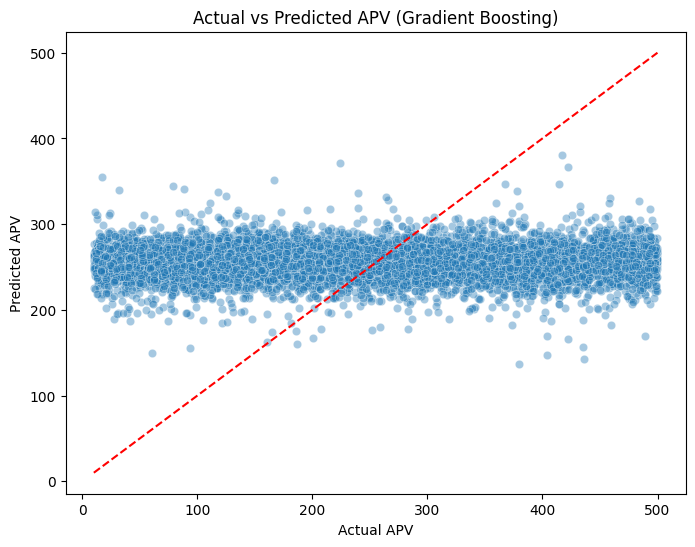

In [ ]:
# Scatter plot: Actual vs Predicted (Random Forest)
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.title("Actual vs Predicted APV (Random Forest)")
plt.xlabel("Actual APV")
plt.ylabel("Predicted APV")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_gb, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.title("Actual vs Predicted APV (Gradient Boosting)")
plt.xlabel("Actual APV")
plt.ylabel("Predicted APV")
plt.show()


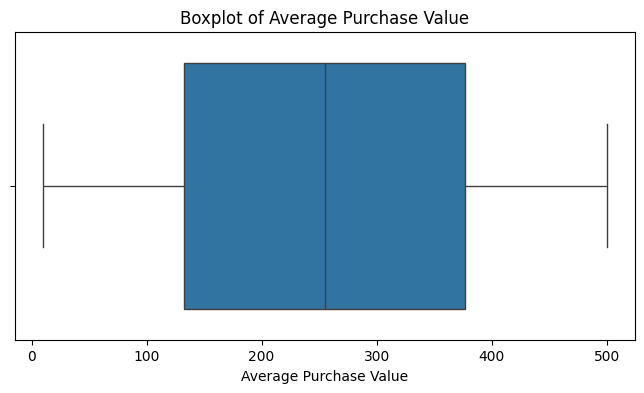

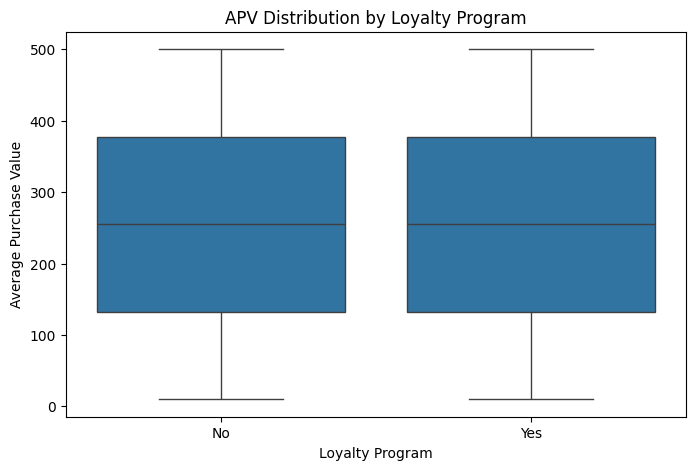

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.boxplot(x=df["avg_purchase_value"])
plt.title("Boxplot of Average Purchase Value")
plt.xlabel("Average Purchase Value")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="loyalty_program", y="avg_purchase_value", data=df)
plt.title("APV Distribution by Loyalty Program")
plt.xlabel("Loyalty Program")
plt.ylabel("Average Purchase Value")
plt.show()


In [ ]:
# Show the first 5 rows
print(df.head())



   age  gender income_bracket loyalty_program  membership_years churned  \
0   41  Female         Medium              No                 3      No   
1   40  Female           High             Yes                 4     Yes   
2   48    Male           High              No                 4     Yes   
3   19    Male            Low              No                 9     Yes   
4   53  Female            Low             Yes                 8      No   

  marital_status  number_of_children education_level  occupation  ...  \
0        Married                   0      Bachelor's    Employed  ...   
1         Single                   4             PhD    Employed  ...   
2        Married                   3      Bachelor's  Unemployed  ...   
3       Divorced                   3      Bachelor's     Retired  ...   
4       Divorced                   2        Master's    Employed  ...   

   distance_to_store holiday_season  season weekend  customer_support_calls  \
0              72.83           

In [ ]:


# Show the datatypes of each column
print(df.dtypes)


age                          int64
gender                      object
income_bracket              object
loyalty_program             object
membership_years             int64
                             ...  
email_subscriptions         object
app_usage                   object
website_visits               int64
social_media_engagement     object
days_since_last_purchase     int64
Length: 77, dtype: object


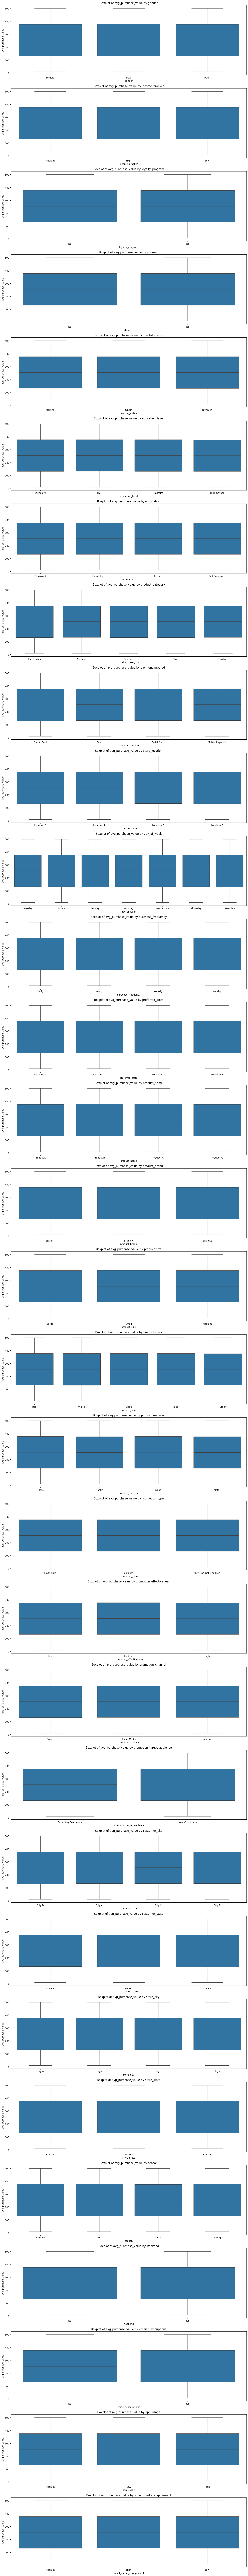

In [ ]:
exclude_keywords = ['date', 'time', 'id']
categorical_cols = [
    col for col in df.columns
    if df[col].dtype == 'object' and not any(keyword in col.lower() for keyword in exclude_keywords)
]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, len(categorical_cols)*5))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    sns.boxplot(x=col, y='avg_purchase_value', data=df)
    plt.title(f'Boxplot of avg_purchase_value by {col}')

plt.tight_layout()
plt.show()


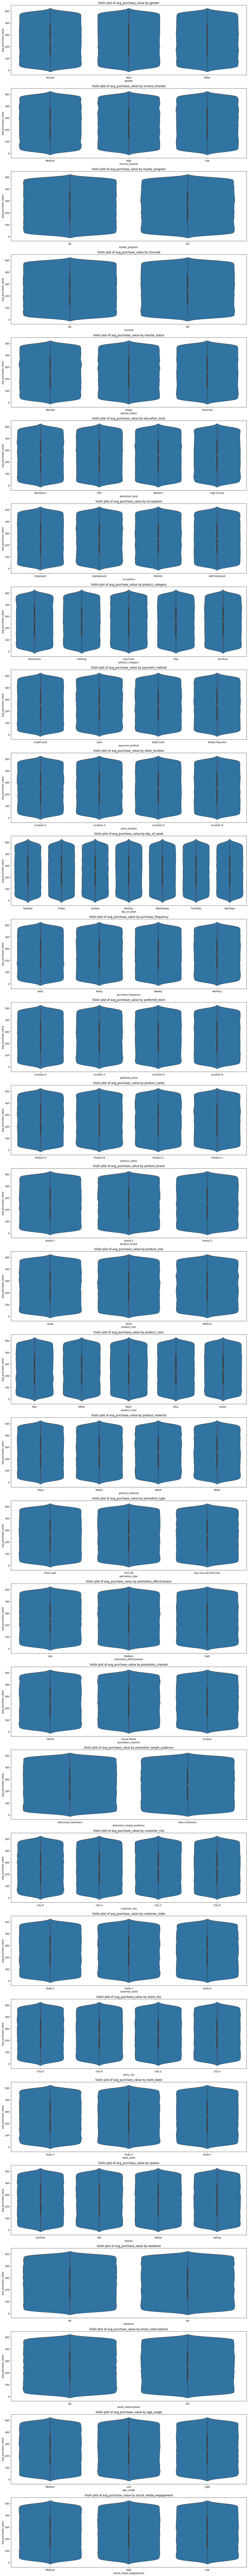

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, len(categorical_cols)*5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    sns.violinplot(x=col, y='avg_purchase_value', data=df)
    plt.title(f'Violin plot of avg_purchase_value by {col}')

plt.tight_layout()
plt.show()


<Axes: xlabel='occupation', ylabel='avg_purchase_value'>

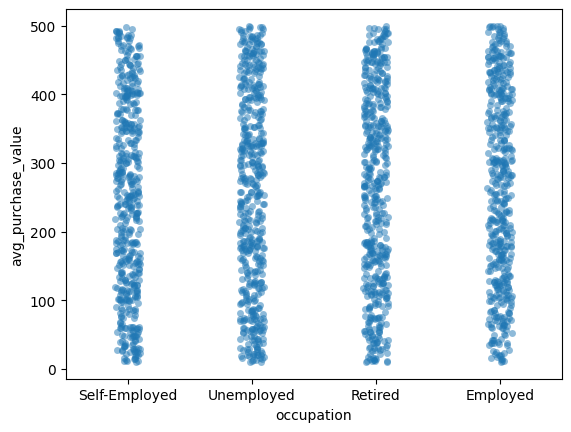

In [ ]:
sample_df = df.sample(2000, random_state=42)  # sample 2000 rows
sns.stripplot(x='occupation', y='avg_purchase_value', data=sample_df, jitter=True, alpha=0.5)


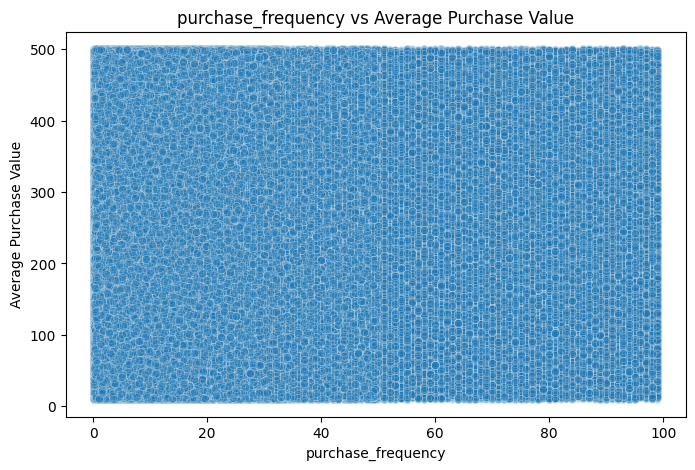

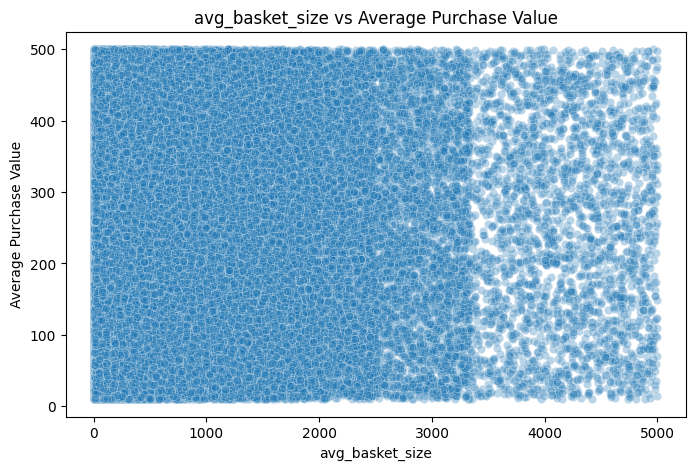

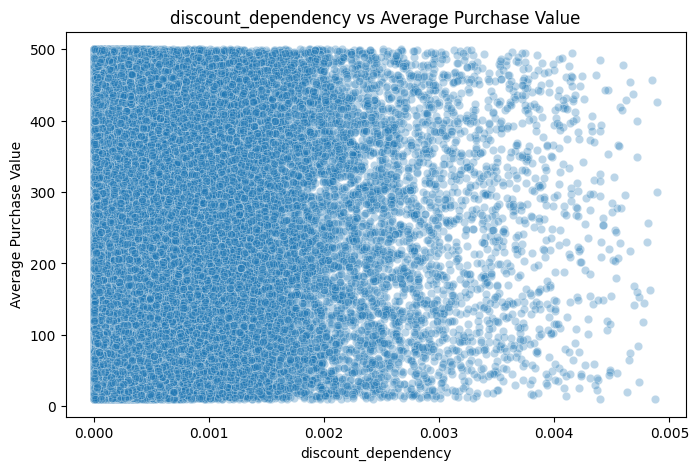

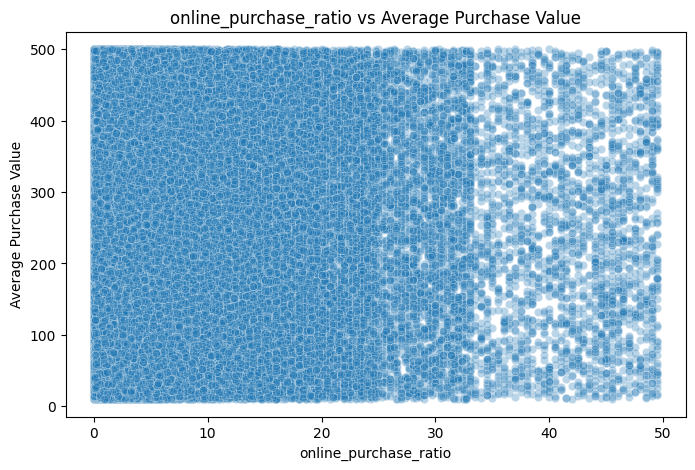

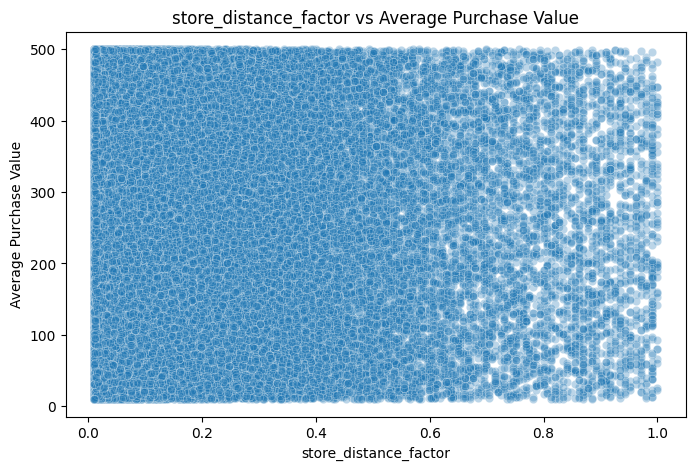

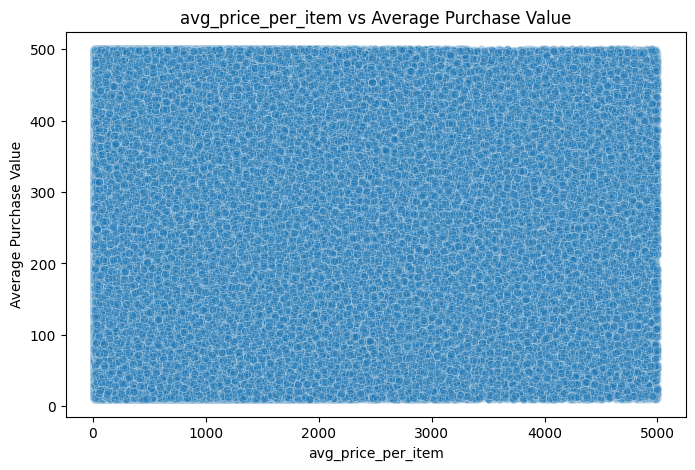

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

drop_cols = [
    'transaction_id', 'product_id', 'promotion_id',
    'customer_zip_code', 'store_zip_code',
    'transaction_date', 'last_purchase_date',
    'product_manufacture_date', 'product_expiry_date',
    'promotion_start_date', 'promotion_end_date'
]

df_fe = df.drop(columns=drop_cols)


df_fe["purchase_frequency"] = df_fe["total_transactions"] / (df_fe["membership_years"] + 1)

df_fe["avg_basket_size"] = df_fe["total_sales"] / (df_fe["total_transactions"] + 1)

df_fe["discount_dependency"] = df_fe["discount_applied"] / (df_fe["total_sales"] + 1)

df_fe["online_purchase_ratio"] = df_fe["online_purchases"] / (df_fe["total_transactions"] + 1)

df_fe["store_distance_factor"] = 1 / (df_fe["distance_to_store"] + 1)

df_fe["avg_price_per_item"] = df_fe["total_sales"] / (df_fe["quantity"] + 1)

features_to_plot = [
    "purchase_frequency", "avg_basket_size",
    "discount_dependency", "online_purchase_ratio",
    "store_distance_factor", "avg_price_per_item"
]

for feat in features_to_plot:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=df_fe[feat], y=df_fe["avg_purchase_value"], alpha=0.3)
    plt.title(f"{feat} vs Average Purchase Value")
    plt.xlabel(feat)
    plt.ylabel("Average Purchase Value")
    plt.show()


Correlation of engineered features with avg_purchase_value:
avg_purchase_value       1.000000
store_distance_factor    0.000959
avg_basket_size          0.000802
online_purchase_ratio    0.000286
discount_dependency      0.000221
purchase_frequency      -0.000484
avg_price_per_item      -0.001994
Name: avg_purchase_value, dtype: float64


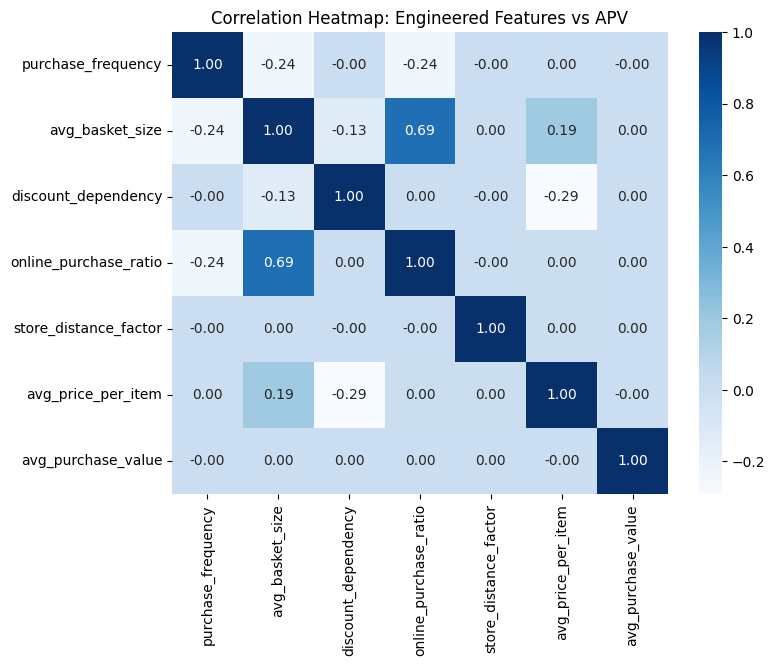

In [ ]:

engineered_features = [
    "purchase_frequency", "avg_basket_size",
    "discount_dependency", "online_purchase_ratio",
    "store_distance_factor", "avg_price_per_item"
]

corrs = df_fe[engineered_features + ["avg_purchase_value"]].corr()["avg_purchase_value"].sort_values(ascending=False)

print("Correlation of engineered features with avg_purchase_value:")
print(corrs)

plt.figure(figsize=(8,6))
sns.heatmap(df_fe[engineered_features + ["avg_purchase_value"]].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap: Engineered Features vs APV")
plt.show()


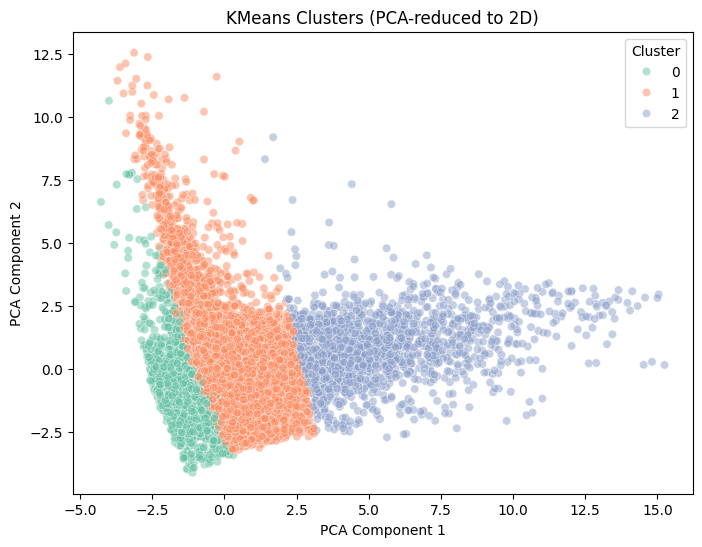

In [ ]:

cluster_features = [
    "purchase_frequency", "avg_basket_size",
    "discount_dependency", "online_purchase_ratio",
    "store_distance_factor", "avg_price_per_item"
]

X = df_fe[cluster_features].fillna(0)

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df_fe["cluster"] = kmeans.fit_predict(X_scaled)

# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

sample_idx = np.random.choice(len(X_pca), size=50000, replace=False)
X_sample = X_pca[sample_idx]
clusters_sample = df_fe["cluster"].iloc[sample_idx]

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_sample[:,0], y=X_sample[:,1], hue=clusters_sample, palette="Set2", alpha=0.5)
plt.title("KMeans Clusters (PCA-reduced to 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


         avg_purchase_value  purchase_frequency  avg_basket_size  \
cluster                                                            
0                    254.69               59.19            73.84   
1                    254.90               10.32           160.25   
2                    254.55                0.87          1783.69   

         discount_dependency  online_purchase_ratio  store_distance_factor  \
cluster                                                                      
0                        0.0                   0.72                   0.05   
1                        0.0                   1.57                   0.05   
2                        0.0                  17.36                   0.05   

         avg_price_per_item   count  
cluster                              
0                   1082.81   76988  
1                   1070.68  692315  
2                   1355.90   30697  


C:\Users\tanvi\AppData\Local\Temp\ipykernel_33612\422740440.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cluster", y="avg_purchase_value", data=df_fe, palette="Set2")


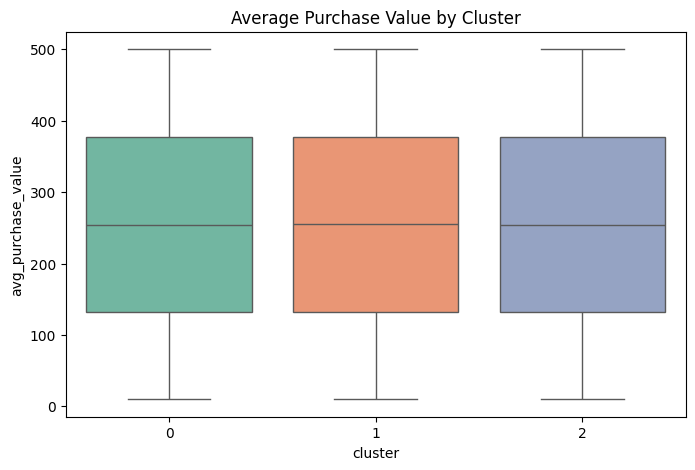

In [ ]:
cluster_features = [
    "purchase_frequency", "avg_basket_size",
    "discount_dependency", "online_purchase_ratio",
    "store_distance_factor", "avg_price_per_item"
]

cluster_summary = df_fe.groupby("cluster")[
    ["avg_purchase_value"] + cluster_features
].mean().round(2)

cluster_summary["count"] = df_fe["cluster"].value_counts().sort_index()

print(cluster_summary)

plt.figure(figsize=(8,5))
sns.boxplot(x="cluster", y="avg_purchase_value", data=df_fe, palette="Set2")
plt.title("Average Purchase Value by Cluster")
plt.show()
